<a href="https://colab.research.google.com/github/afrojaakter/Surrogate-Based-Optimization/blob/main/SurrogateModelGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
print(__doc__)
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt

Automatically created module for IPython interactive environment


In [35]:
!pip install scikit-optimize

    100% |████████████████████████████████| 102kB 6.3MB/s 


### Toy Model

I will use the Branin function: $$ f(x) = a(x_2 - bx_1^2 + cx_1 - r)^2 + s( 1-t) cos(x_1) + s$$ as toy model for the expensive function. In real world application this function will be unknown and expensive to evaluate. 

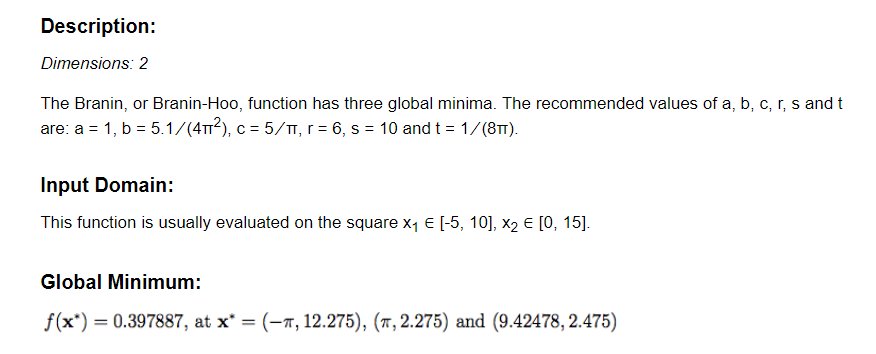

In [36]:
from skopt.benchmarks import branin as _branin

def branin(x, noise_level=0.):
    return _branin(x) + noise_level * np.random.randn()

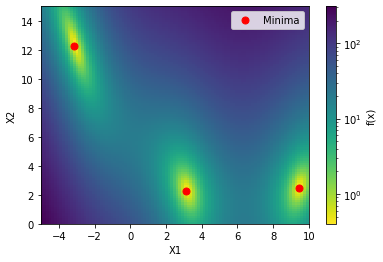

In [37]:
from matplotlib.colors import LogNorm


def plot_branin():
    fig, ax = plt.subplots()

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(),
                                    vmax=fx.max()),
                       cmap='viridis_r')

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14,
            lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])


plot_branin()

This shows the value of the two-dimensional branin function and the three 
minima.

### Objective
The objective of this example is to find one of these minima in as few iterations as possible. One iteration is defined as one call to the branin function.

I will evaluate GP model several times using a different seed for the random number generator. 

In [38]:
from functools import partial
from skopt import gp_minimize

func = partial(branin, noise_level=2.0)
bounds = [(-5.0, 10.0), (0.0, 15.0)]
n_calls = 60

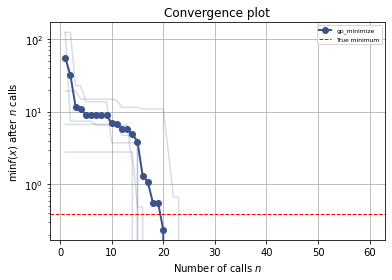

In [41]:
from skopt.plots import plot_convergence

def run(minimizer, n_iter=5):
    return [minimizer(func, bounds, n_calls=n_calls, random_state=n)
            for n in range(n_iter)]


# Gaussian processes
gp_res = run(gp_minimize)

plot = plot_convergence(("gp_minimize", gp_res),
                        true_minimum=0.397887, yscale="log")

plot.legend(loc="best", prop={'size': 6}, numpoints=1)

This plot shows the value of the minimum found as a function of the number of iterations performed so far. The dashed red line indicates the true value of the minimum of the branin function.

Minimizer only has access to noisy observations of the objective function, so as time passes (more iterations) it will start observing values that are below the true value simply because they are fluctuations.